## Creates binarized Seurat objects, integrates conditions and annotates genes by nearby peaks

In [1]:
# Input info
#cellr_in = "/home/isaac/lewis/mito_lineage/output/mtscATAC/data/DUPI_april08_2021_Croker/MTblacklist_mtasnucl/" 
cellr_in = "/home/isaac/lewis/mito_lineage/output/mtscATAC/data/CHIP_dec172021_b2/MTblacklist_A2/"

outdir = "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/v04/CHIP_b2/InputOnly/MTBlacklist_A2/data/annotation/gff_A2_black/external_granja/"
sample_names = "Input"
samples = "Input"

# Parameters
nTop = 25000
cores = 24
gff_id = "hg38_1_2"

annotations_indir = "/mnt/md0/isshamie/Projects/Mito_Trace/data/processed/annotation_granges/"

# External
external_dat_dir <- "/data/Mito_Trace/output/annotation/data/granja_cd34/"
external_frag_file <- "/data/Mito_Trace/output/annotation/data/granja_cd34/granja_cd34.fragments.sort.tsv.gz"
external_prefix <- "GSE129785_scATAC-Hematopoiesis-CD34"
ext_name <- "granja_cd34"


# Parameters
nTop = 25000
lsi_start_comp = 2
to.filt.cells = "TRUE"


to.qc = FALSE
## QC parameters
# min_peak_region_fragments=1000
# max_peak_region_fragments=10000
# min_pct_reads_in_peaks=20
# max_blacklist_ratio=0.05
# max_nucleosome_signal=15
# min_TSS_enrichment=0.2

min_peak_region_fragments=10
max_peak_region_fragments=15000
min_pct_reads_in_peaks=15
max_blacklist_ratio=0.05
max_nucleosome_signal=4
min_TSS_enrichment=0.2


In [2]:
if ((to.filt.cells == "T") | (to.filt.cells == "TRUE")){
    to.filt.cells = TRUE
}else{to.filt.cells = FALSE}


In [3]:
library(repr)
options(repr.plot.width=12, repr.plot.height=12)

Warning message:
“package ‘repr’ was built under R version 4.1.2”


In [4]:
samples <- unlist(strsplit(samples, ",")[[1]])
sample_names <- unlist(strsplit(sample_names, ","))

samples

[1] "Input"

In [5]:
# Change to the sorted fragment file!
ext_frag_file <- gsub('.fragments.tsv', '.fragments.sort.tsv.gz', external_frag_file)

external_dat_dir <- dirname(external_frag_file)
external_frag_file

[1] "/data/Mito_Trace/output/annotation/data/granja_cd34/granja_cd34.fragments.sort.tsv.gz"

In [6]:
annotations <- readRDS(file.path(annotations_indir, paste0(gff_id, ".annotationGranges.rds")))

In [7]:
annotations

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Warning message:
“package ‘S4Vectors’ was built under R version 4.1.2”

Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Warning message:
“package ‘IRanges’ was built under

GRanges object with 1684537 ranges and 21 metadata columns:
            seqnames      ranges strand |   source       type     score
               <Rle>   <IRanges>  <Rle> | <factor>   <factor> <numeric>
        [1]     chr1 11869-14409      + |   HAVANA gene              NA
        [2]     chr1 11869-14409      + |   HAVANA transcript        NA
        [3]     chr1 11869-12227      + |   HAVANA exon              NA
        [4]     chr1 12613-12721      + |   HAVANA exon              NA
        [5]     chr1 13221-14409      + |   HAVANA exon              NA
        ...      ...         ...    ... .      ...        ...       ...
  [1684533]     chrM 15888-15953      + |  ENSEMBL transcript        NA
  [1684534]     chrM 15888-15953      + |  ENSEMBL exon              NA
  [1684535]     chrM 15956-16023      - |  ENSEMBL gene              NA
  [1684536]     chrM 15956-16023      - |  ENSEMBL transcript        NA
  [1684537]     chrM 15956-16023      - |  ENSEMBL exon              NA
    

In [8]:
library(GenomicRanges)
library(Seurat)
library(Signac)
library(GenomeInfoDb)
#library(EnsDb.Hsapiens.v75)
library(ggplot2)
library(patchwork)
set.seed(1234)
library(data.table)
library(magrittr)
library(cowplot)
library(metap)
library(dplyr)
library(future)

plan("multiprocess", workers = cores)
options(future.globals.maxSize = 8000 * 1024^2)
#options(future.globals.maxSize = 50000 * 1024^2) # for 50 Gb RAM
#plan("multiprocess", workers = workers)

Registered S3 method overwritten by 'spatstat.core':
  method          from
  formula.glmmPQL MASS

Attaching SeuratObject

Attaching sp

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”

Attaching package: ‘data.table’


The following object is masked from ‘package:GenomicRanges’:

    shift


The following object is masked from ‘package:IRanges’:

    shift


The following objects are masked from ‘package:S4Vectors’:

    first, second


Warning message:
“package ‘magrittr’ was built under R version 4.1.3”

Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


Warning message:
“package ‘dplyr’ was built under R version 4.1.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect




In [9]:


# # Create a unified set of peaks to quantify in each dataset
# #combined.peaks <- reduce(x = c(gr.500, gr.1k, gr.5k, gr.10k))
# combined.peaks <- reduce(x = c(gr.ext, gr.curr))

# # Filter out bad peaks based on length
# peakwidths <- width(combined.peaks)
# combined.peaks <- combined.peaks[peakwidths  < 10000 & peakwidths > 20]
# combined.peaks

## External data processing

In [10]:
barcode_path <- file.path(external_dat_dir, paste0(external_prefix, ".cell_barcodes.txt"))

metadata <- read.csv(
  file = file.path(external_dat_dir, paste0(external_prefix, ".cell_barcodes.txt")),
  header = TRUE,
  sep='\t',
)
#CD34boo <- colData$Group %in% c("CD34_Progenitors_Rep1","CD34_Progenitors_Rep2")
c1boo <-  metadata$Group %in% c("BM_pDC", "CLP", "CMP", "GMP", "HSC", "LMPP", "MEP", "Monocytes", "MPP")
metadata <- metadata[c1boo,]

rownames(metadata) <- metadata$Group_Barcode
metadata$proj <- "granja_cd34"
ext_cell_names <- rownames(metadata)
metadata <- metadata[,c("Group", "proj")]
ext_cell_names



[1] "Monocytes#ATTTGTCCACAGAAGC-1"              
   [2] "Monocytes#ACTGCAATCTTCCAGC-1"              
   [3] "Monocytes#CCGAAGCGTCGTAGTT-1"              
   [4] "Monocytes#TGGAAGGCAAGGCGTA-1"              
   [5] "Monocytes#CGCACAGGTCACCCGA-1"              
   [6] "Monocytes#TTGCACCGTGAATCAA-1"              
   [7] "Monocytes#AATGGCTGTACATGGG-1"              
   [8] "Monocytes#ACTATTCGTCTCGGGT-1"              
   [9] "Monocytes#AGTGCGCTCGTCGCAG-1"              
  [10] "Monocytes#ACAGCGCTCACTCGGG-1"              
  [11] "Monocytes#CTCTCGAAGAAATGGG-1"              
  [12] "Monocytes#ACCATCCGTCGCTAGC-1"              
  [13] "Monocytes#AACCTTTCAACAAACA-1"              
  [14] "Monocytes#CTAGCGGTCGTGCTTC-1"              
  [15] "Monocytes#TTATGTCTCATTGCCC-1"              
  [16] "Monocytes#GTGCCAGGTTCCTATT-1"              
  [17] "Monocytes#GGATAGGAGATGAGGA-1"              
  [18] "Monocytes#AGCCTGGAGAACGCCA-1"              
  [19] "Monocytes#AACAAAGTCTTACTCA-1"              
  [20] "Monocytes#GGCGAAAGTGCGCATC-1"              
  [21] "Monocytes#CAGCTAACACGCGCAT-1"              
  [22] "Monocytes#CTTGAAGAGAGTTCGG-1"              
  [23] "Monocytes#GCGAGTCCACAAACAA-1"              
  [24] "Monocytes#GCATGATAGCTACGTT-1"              
  [25] "Monocytes#CACTAAGAGGCCAATG-1"              
  [26] "Monocytes#AATACGCAGCGTAGCA-1"              
  [27] "Monocytes#ACTGCGGAGGCAATTA-1"              
  [28] "Monocytes#GTTATTCTCGGTCTAA-1"              
  [29] "Monocytes#GCCCAGAAGTGTTCCA-1"              
  [30] "Monocytes#CCTTGCAGTATTCTTC-1"              
  [31] "Monocytes#GGAGAACAGAGCAGCT-1"              
  [32] "Monocytes#TTAGCGAGTGACGCAA-1"              
  [33] "Monocytes#TCAGGGCAGCATGATA-1"              
  [34] "Monocytes#TACATTCCAGATACAA-1"              
  [35] "Monocytes#GTGACATCATCGTACA-1"              
  [36] "Monocytes#GCTGTTCGTACGTATC-1"              
  [37] "Monocytes#TGACAACAGTCTGGGA-1"              
  [38] "Monocytes#GCTCAGGTCTAGCTGA-1"              
  [39] "Monocytes#GGCGTTGTCCCACTAC-1"              
  [40] "Monocytes#AGCCGCAAGGCAGTAC-1"              
  [41] "Monocytes#GAACTTGGTCTGAGCC-1"              
  [42] "Monocytes#GTAGTACCAATACTGC-1"              
  [43] "Monocytes#ATTACTCTCGCGCCAA-1"              
  [44] "Monocytes#AACAGTCCATCGTACA-1"              
  [45] "Monocytes#AGCCTTCTCCTTACGC-1"              
  [46] "Monocytes#TGCTATTGTTCCATCC-1"              
  [47] "Monocytes#AGTCCGGCACTAAACC-1"              
  [48] "Monocytes#ATCCAGAAGGTTACAA-1"              
  [49] "Monocytes#GAGGTCCTCGTCTTAT-1"              
  [50] "Monocytes#TAGCCCTGTAGCGAGT-1"              
  [51] "Monocytes#AAGGAGCCAGTATCTG-1"              
  [52] "Monocytes#TTGCGAACACACTAGT-1"              
  [53] "Monocytes#CTTGTCGCAACGGACA-1"              
  [54] "Monocytes#ACTGCGGGTAATGCAA-1"              
  [55] "Monocytes#TAATCGGGTGATGTGG-1"              
  [56] "Monocytes#GCATTCCCACTGTTAG-1"              
  [57] "Monocytes#AACTTGGTCAACACGT-1"              
  [58] "Monocytes#CTGGGACAGGGTAATT-1"              
  [59] "Monocytes#TGTACGAAGGGAAATG-1"              
  [60] "Monocytes#CCCTGATTCCGTCAAA-1"              
  [61] "Monocytes#GATCATGCATAGGCGA-1"              
  [62] "Monocytes#GGGACCTGTCTAAGAA-1"              
  [63] "Monocytes#GATCATGTCCATAACG-1"              
  [64] "Monocytes#TATGTTCCACTTGCGG-1"              
  [65] "Monocytes#TGGACATCAAGGGAGG-1"              
  [66] "Monocytes#CCTGCTATCTAAGGTC-1"              
  [67] "Monocytes#GTGTGATGTAGAATAC-1"              
  [68] "Monocytes#TCAGTTTTCGACTCGG-1"              
  [69] "Monocytes#CTGGCAGTCGCAACTA-1"              
  [70] "Monocytes#TGGCAATGTTAGCTCA-1"              
  [71] "Monocytes#GACCCAGAGTGCTAGG-1"              
  [72] "Monocytes#GACCAATCAAGCGGTA-1"              
  [73] "Monocytes#CATAACGAGGGTAATT-1"              
  [74] "Monocytes#TACGGATTCTTGTGCC-1"              
  [75] "Monocytes#TAACGGTGTCCACCAG-1"              
  [76] "Monocytes#ATATTCCTCAGAATGA-1"              
  [77] "Monocytes#GCCCGAAGTTGCCGCA-1"              

## Merge all peaks

In [11]:
read.peaks <- function(exp, cellr_in){
    print('here')
    print(file.path(cellr_in, exp, "outs", "filtered_peak_bc_matrix", "peaks.bed"))
    peaks <- read.table(
      file = file.path(cellr_in, exp, "outs", "filtered_peak_bc_matrix", "peaks.bed"),
      col.names = c("chr", "start", "end")
    )
    # convert to genomic ranges
    gr <- makeGRangesFromDataFrame(peaks)
    return(gr)
}


gr.full <- c(sapply(samples, read.peaks, cellr_in=cellr_in, USE.NAMES=F))

gr.full.c <- gr.full[[1]]
if (length(gr.full)>1){
    for (i in 2:length(gr.full)){
      gr.full.c <- c(gr.full.c, gr.full[[i]])
    }
}
combined.peaks <- reduce(x = c(gr.full.c))

# read in peak sets
peaks.ext <- read.table(
  file = file.path(external_dat_dir, paste0(external_prefix, ".peaks.bed")),
  col.names = c("chr", "start", "end")
)

# convert to genomic ranges
gr.ext <- makeGRangesFromDataFrame(peaks.ext)

combined.peaks <- reduce(x = c(gr.ext, combined.peaks))


# Filter out bad peaks based on length
peakwidths <- width(combined.peaks)
combined.peaks <- combined.peaks[peakwidths  < 10000 & peakwidths > 20]
head(combined.peaks)

[1] "here"
[1] "/home/isaac/lewis/mito_lineage/output/mtscATAC/data/CHIP_dec172021_b2/MTblacklist_A2//Input/outs/filtered_peak_bc_matrix/peaks.bed"


GRanges object with 6 ranges and 0 metadata columns:
      seqnames        ranges strand
         <Rle>     <IRanges>  <Rle>
  [1]     chr1   10140-10738      *
  [2]     chr1 115476-115976      *
  [3]     chr1 191428-191697      *
  [4]     chr1 236856-237356      *
  [5]     chr1 237511-238011      *
  [6]     chr1 240801-241301      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [46]:
gr.full[[1]]

GRanges object with 95583 ranges and 0 metadata columns:
          seqnames            ranges strand
             <Rle>         <IRanges>  <Rle>
      [1]     chr1       10140-10321      *
      [2]     chr1     191428-191697      *
      [3]     chr1     267866-268171      *
      [4]     chr1     605425-605747      *
      [5]     chr1     778220-779295      *
      ...      ...               ...    ...
  [95579]     chrY 56863422-56863474      *
  [95580]     chrY 56867688-56868010      *
  [95581]     chrY 56868863-56871249      *
  [95582]     chrY 56872060-56873139      *
  [95583]     chrY 56873647-56874595      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [44]:
peaks.ext

chr,start,end
<chr>,<int>,<int>
chr1,10238,10738
chr1,115476,115976
chr1,236856,237356
chr1,237511,238011
chr1,240801,241301
chr1,250084,250584
chr1,540710,541210
chr1,710379,710879
chr1,714861,715361


In [12]:
length(gr.ext)

[1] 571389

In [13]:
length(combined.peaks)

[1] 625843

## Are any peaks in the chrM

In [14]:
length(combined.peaks[seqnames(combined.peaks) != "chrM"])


[1] 625843

In [15]:
combined.peaks[seqnames(combined.peaks) == "chrM"]

combined.peaks[seqnames(combined.peaks) == "chr1"]


GRanges object with 0 ranges and 0 metadata columns:
   seqnames    ranges strand
      <Rle> <IRanges>  <Rle>
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

GRanges object with 58782 ranges and 0 metadata columns:
          seqnames              ranges strand
             <Rle>           <IRanges>  <Rle>
      [1]     chr1         10140-10738      *
      [2]     chr1       115476-115976      *
      [3]     chr1       191428-191697      *
      [4]     chr1       236856-237356      *
      [5]     chr1       237511-238011      *
      ...      ...                 ...    ...
  [58778]     chr1 249219589-249220089      *
  [58779]     chr1 249220921-249221421      *
  [58780]     chr1 249222267-249222767      *
  [58781]     chr1 249238910-249239410      *
  [58782]     chr1 249239576-249240076      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

## Remove any peaks in the chrM

In [16]:
combined.peaks = combined.peaks[seqnames(combined.peaks) != "chrM"]
length(combined.peaks)

[1] 625843

## Create fragment objects

### Create external first

In [17]:
# quantify multiome peaks in the scATAC-seq dataset
frags.ext <- CreateFragmentObject(path = ext_frag_file,
                                  cells= ext_cell_names)

ext.counts <- FeatureMatrix(
  fragments = frags.ext,
  features = combined.peaks,
  cells = rownames(metadata)
)

ext_assay <- CreateChromatinAssay(ext.counts, fragments = frags.ext, min.cells = 10, min.features = 200)
ext <- CreateSeuratObject(ext_assay, assay = "ATAC", project=ext_name, meta.data=metadata)


Computing hash

Extracting reads overlapping genomic regions

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from atac to atac_”


### Create for each sample

In [18]:
allSE = c() 

samples_df <- cbind(sample_names, samples)
print('samples_df')
print(samples_df)
for (row in 1:nrow(samples_df)){
    exp <- (samples_df[[row, "samples"]])
    name <- (samples_df[[row, "sample_names"]]) 
    
#for (exp in samples) {
    print('exp')
    print(exp)
    print('name')
    print(name)
    barcode_path <- file.path(cellr_in, exp, "outs", "filtered_peak_bc_matrix", "barcodes.tsv")    
    barcodes <- readr::read_tsv(barcode_path, col_names = F) # %>% tidyr::unite(barcode)
    barcodes <- as.data.frame(barcodes) %>%  tibble::column_to_rownames(var="X1") %>% tibble::add_column(proj=name)
    frag_file <- file.path(cellr_in, exp, "outs", "fragments.tsv.gz")
    
    cells.meta.f <- file.path(cellr_in, exp, "outs", "singlecell.csv") 
    cells.meta <- as.data.frame(readr::read_csv(cells.meta.f)) %>% tibble::column_to_rownames(var="barcode") %>% tibble::add_column(proj=name)
    cells.meta <- cells.meta[rownames(cells.meta) %in% rownames(barcodes), ]

    # quantify multiome peaks in the scATAC-seq dataset
    
    
    print("Creating fragments object")
    frags.curr <- CreateFragmentObject(path = frag_file, cells= rownames(barcodes))
    #print(frags.curr)
    print("Quantifying peaks")
    ## Quantify peaks
    curr.counts <- FeatureMatrix(
      fragments = frags.curr,
      features = combined.peaks,
      cells = rownames(barcodes),
      process_n = cores
    )
    
    print("Creating chromatin assay")
    ## Create the objects and use simple filters
    curr_assay <- CreateChromatinAssay(curr.counts, fragments = frags.curr, min.cells = 10, min.features = 200)
    curr <- CreateSeuratObject(curr_assay, assay = "ATAC", project=name, meta.data=cells.meta)
    print('curr_assay')
    print(head(curr_assay))
    print('curr')
    print(head(curr[[]]))
    allSE = c(allSE, curr)
    #return(curr)
}

allSE

#allSE <- sapply(samples, create_frag, cellr_in=cellr_in)

[1] "samples_df"
     sample_names samples
[1,] "Input"      "Input"
[1] "exp"
[1] "Input"
[1] "name"
[1] "Input"


Rows: 4769 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 405884 Columns: 18
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): barcode, cell_id
dbl (16): total, duplicate, chimeric, unmapped, lowmapq, mitochondrial, pass...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Creating fragments object"


Computing hash



[1] "Quantifying peaks"


Extracting reads overlapping genomic regions



[1] "Creating chromatin assay"


Warning message in CreateSeuratObject.Assay(curr_assay, assay = "ATAC", project = name, :
“Some cells in meta.data not present in provided counts matrix.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from atac to atac_”


[1] "curr_assay"
data frame with 0 columns and 10 rows
[1] "curr"
                   orig.ident nCount_ATAC nFeature_ATAC total duplicate
AAACGAAAGCCGCAAA-1      Input        1143          1108 16081      1250
AAACGAACAGATGGCA-1      Input        7205          6521 44699     10292
AAACGAAGTATGTTCG-1      Input        4477          4132 21594      5059
AAACGAAGTCATTGGT-1      Input         568           557  9191       460
AAACGAATCAGAGTGG-1      Input        1720          1654 10961      1743
AAACGAATCCGGACTG-1      Input        2345          2251 15146      1793
                   chimeric unmapped lowmapq mitochondrial passed_filters
AAACGAAAGCCGCAAA-1       25       60     379         11724           2643
AAACGAACAGATGGCA-1      190      169    1753         15193          17102
AAACGAAGTATGTTCG-1      133       91     784          8125           7402
AAACGAAGTCATTGGT-1       12       19     137          7471           1092
AAACGAATCAGAGTGG-1       56       43     289          4957  

[[1]]
An object of class Seurat 
137307 features across 4768 samples within 1 assay 
Active assay: ATAC (137307 features, 0 variable features)


### Add the external with the others

In [19]:
allSE <- c(ext, allSE )
allSE

[[1]]
An object of class Seurat 
285790 features across 2196 samples within 1 assay 
Active assay: ATAC (285790 features, 0 variable features)

[[2]]
An object of class Seurat 
137307 features across 4768 samples within 1 assay 
Active assay: ATAC (137307 features, 0 variable features)


In [20]:
sample_names <- c(ext_name, sample_names)

## QC Metrics

In [21]:
library(Rsamtools)

qc <- function(se){
    # add the gene information to the object
    Annotation(se) <- annotations
    
    # compute nucleosome signal score per cell
    se <- NucleosomeSignal(object = se)
    
    # compute TSS enrichment score per cell
    se <- TSSEnrichment(object = se, fast = FALSE)

    # add blacklist ratio and fraction of reads in peaks
    se$pct_reads_in_peaks <- se$peak_region_fragments / se$passed_filters * 100
    se$blacklist_ratio <- se$blacklist_region_fragments / se$peak_region_fragments
    se$high.tss <- ifelse(se$TSS.enrichment > 2, 'High', 'Low')
    se$nucleosome_group <- ifelse(se$nucleosome_signal > 4, 'NS > 4', 'NS < 4')

    return(se)
}
vPlot <- function(se){
      vPlot <- VlnPlot(
      object = se,
      features = c('pct_reads_in_peaks', 'peak_region_fragments',
                   'TSS.enrichment', 'blacklist_ratio', 'nucleosome_signal'),
      pt.size = 0.1,
      ncol = 5
    )  
    vPlot <- vPlot +    # Create grid of plots with title
             plot_annotation(title = se$orig.ident[[1]]) & 
             theme(plot.title = element_text(hjust = 0.5, size=15))
    #print(vPlot)
    return(vPlot)
}


Warning message:
“package ‘Rsamtools’ was built under R version 4.1.2”
Loading required package: Biostrings

Warning message:
“package ‘Biostrings’ was built under R version 4.1.2”
Loading required package: XVector

Warning message:
“package ‘XVector’ was built under R version 4.1.2”

Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit




In [22]:
# allSE <- lapply(allSE, qc)
# saveRDS(allSE, file.path(outdir, paste0("allSamples.rds")))
# lapply(allSE,vPlot)
# ggsave(file.path(outdir, paste0("QC_01.png")))
# ggsave(file.path(outdir, paste0("QC_01.pdf")))

In [23]:
filtCells <- function(se, min_peak_region_fragments=10,
                      max_peak_region_fragments=15000,
                     min_pct_reads_in_peaks=15,
                     max_blacklist_ratio=0.05,
                     max_nucleosome_signal=4,
                     min_TSS_enrichment=2){
    print('se before filt')
    print(se)
    se <- subset(
      x = se,
      subset = peak_region_fragments > min_peak_region_fragments &
               peak_region_fragments < max_peak_region_fragments &
               pct_reads_in_peaks > min_pct_reads_in_peaks &
               blacklist_ratio < max_blacklist_ratio &
               nucleosome_signal < max_nucleosome_signal  &
               TSS.enrichment > min_TSS_enrichment
    )
    print('se after filt')
    print(se)
    return(se)
}

if (to.filt.cells){
    allSE <- lapply(allSE, filtCells,
                    min_peak_region_fragments=min_peak_region_fragments,
                    max_peak_region_fragments=max_peak_region_fragments,
                    min_pct_reads_in_peaks=min_pct_reads_in_peaks,
                    max_blacklist_ratio=max_blacklist_ratio,
                    max_nucleosome_signal=max_nucleosome_signal,
                    min_TSS_enrichment=min_TSS_enrichment)
}

[1] "se before filt"
An object of class Seurat 
285790 features across 2196 samples within 1 assay 
Active assay: ATAC (285790 features, 0 variable features)


ERROR: Error in FetchData.Seurat(object = object, vars = unique(x = expr.char[vars.use]), : None of the requested variables were found: 


# Merge

In [27]:
# Add sample names to cell prefix here.
for (i in 1:length(allSE)){
    print(i)
    curr.SE <- allSE[[i]]
    allSE[[i]] <- RenameCells(allSE[[i]], add.cell.id=curr.SE$orig.ident[[1]])
}

allSE[[1]][["ATAC"]]

[1] 1
[1] 2


ChromatinAssay data with 285790 features for 2196 cells
Variable features: 0 
Genome: 
Annotation present: FALSE 
Motifs present: FALSE 
Fragment files: 1 

In [28]:
# merge all datasets, adding a cell ID to make sure cell names are unique
# combined <- merge(
#   x = allSE[[1]],
#   y = unlist(allSE[2:length(allSE)]),
# )

if(length(sample_names) == 1){
    combined = allSE[[1]]
}else{
    combined <- merge(
      x = allSE[[1]],
      y = allSE[[2]])
}

if(length(sample_names) > 2) {
    for (i in 3:length(sample_names)){
        combined <- merge(x=combined,
                          y = allSE[[i]])
        }
}

In [29]:
combined <- FindTopFeatures(combined, min.cutoff = 20)
combined

An object of class Seurat 
379853 features across 6964 samples within 1 assay 
Active assay: ATAC (379853 features, 244117 variable features)

In [31]:
combined

An object of class Seurat 
379853 features across 6964 samples within 1 assay 
Active assay: ATAC (379853 features, 244117 variable features)

In [30]:
combined$orig.ident <- factor(combined$orig.ident, levels = sample_names)

VlnPlot(
  object = combined,
  features = c('nCount_ATAC', 'peak_region_fragments', 'passed_filters',
               'duplicate', 'unmapped'),
  split.by = "orig.ident",
  pt.size = 0.1,
  ncol = 3
)


The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.



ERROR: Error in if (all(data[, feature] == data[, feature][1])) {: missing value where TRUE/FALSE needed


Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:32:07 UMAP embedding parameters a = 0.9922 b = 1.112

15:32:07 Read 6964 rows and found 49 numeric columns

15:32:07 Using Annoy for neighbor search, n_neighbors = 30

15:32:07 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:32:08 Writing NN index file to temp file /tmp/Rtmp6zVIT3/file9e09fb1b8d12

15:32:08 Searching Annoy index using 24 threads, search_k = 3000

15:32:08 Annoy recall = 100%

15:32:09 Commencing 

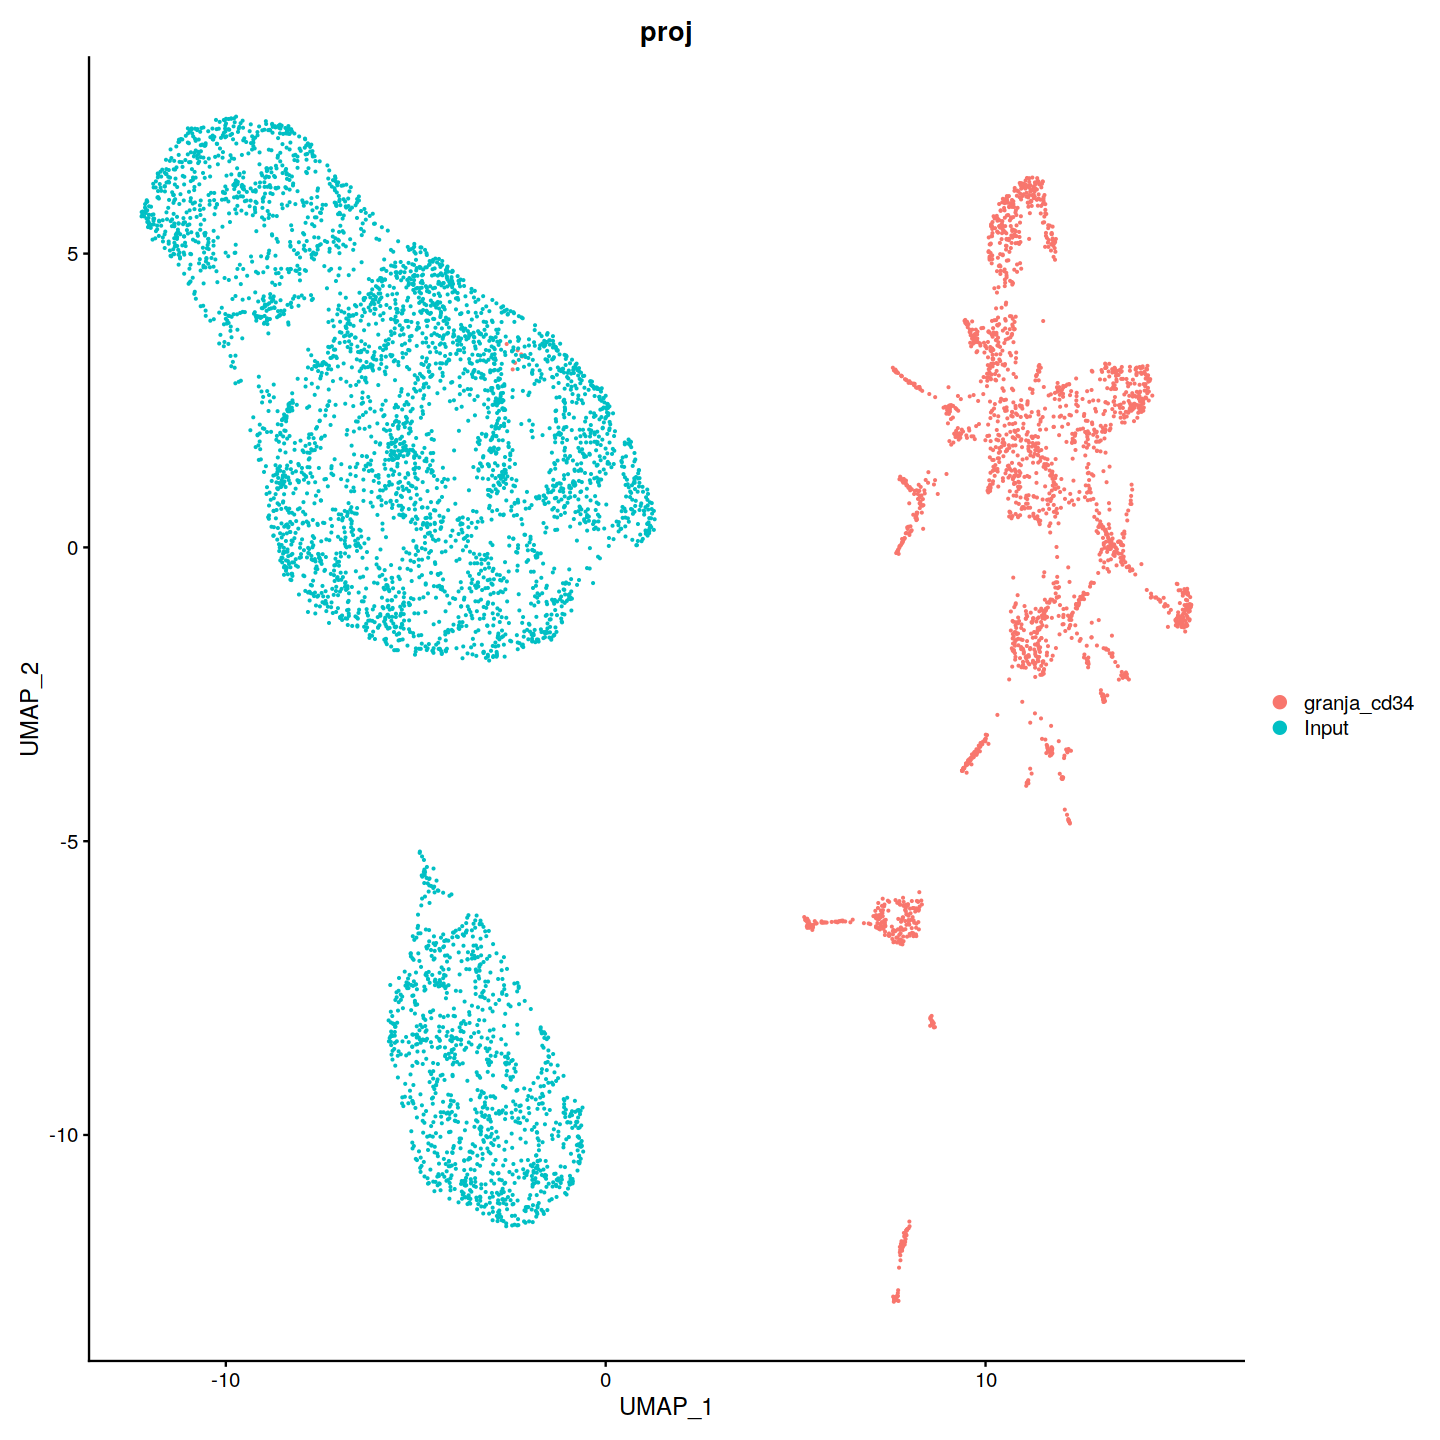

In [32]:
# Binarize and run LSI
combined <- BinarizeCounts(combined)
combined <- RunTFIDF(combined)
combined <- RunSVD(combined)
combined <- RunUMAP(combined, dims = lsi_start_comp:50, reduction = 'lsi')
DimPlot(combined, group.by = "proj", pt.size = 0.1)

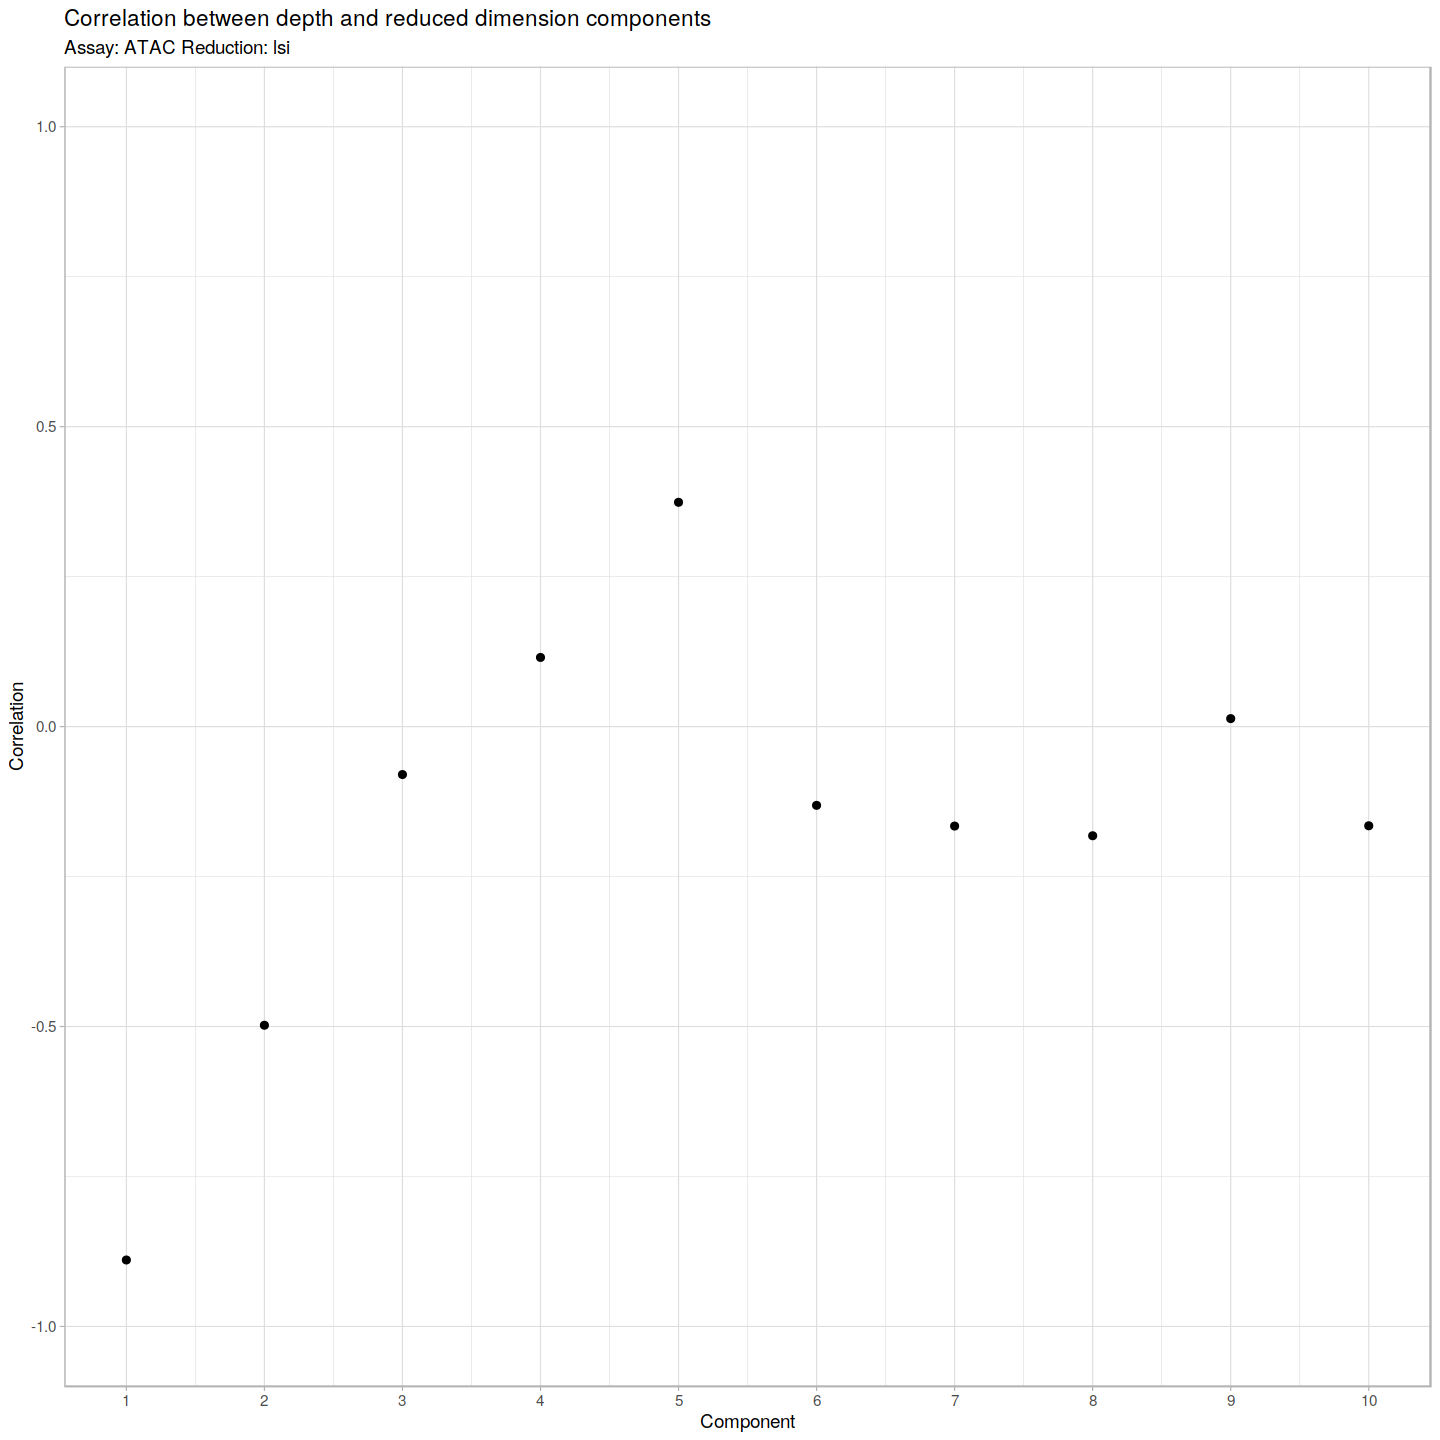

In [33]:
pDepthCorr <- DepthCor(combined)
pDepthCorr

### Split back into groups - add external sample_names

In [34]:
sample_names


[1] "granja_cd34" "Input"

In [35]:
allSE


[[1]]
An object of class Seurat 
285790 features across 2196 samples within 1 assay 
Active assay: ATAC (285790 features, 0 variable features)

[[2]]
An object of class Seurat 
137307 features across 4768 samples within 1 assay 
Active assay: ATAC (137307 features, 0 variable features)


In [36]:
sample_names

[1] "granja_cd34" "Input"

In [37]:
allSE[[1]]

An object of class Seurat 
285790 features across 2196 samples within 1 assay 
Active assay: ATAC (285790 features, 0 variable features)

In [38]:
allSE[[2]]

An object of class Seurat 
137307 features across 4768 samples within 1 assay 
Active assay: ATAC (137307 features, 0 variable features)

In [39]:
allSE <- lapply(sample_names,  function(x) subset(combined, subset = orig.ident == x))
allSE

[[1]]
An object of class Seurat 
379853 features across 2196 samples within 1 assay 
Active assay: ATAC (379853 features, 244117 variable features)
 2 dimensional reductions calculated: lsi, umap

[[2]]
An object of class Seurat 
379853 features across 4768 samples within 1 assay 
Active assay: ATAC (379853 features, 244117 variable features)
 2 dimensional reductions calculated: lsi, umap


# Integrate, using external data as first entry, which serves as the anchor

In [43]:
if( length(sample_names) == 1){
    integrated = allSE[[1]]
}else{
    # find integration anchors
    print("getting anchors ")
    integration.anchors <- FindIntegrationAnchors(
      object.list = allSE, #c(ext,curr),
      anchor.features = allSE[[1]], #rownames(ext),
      reduction = "rlsi",
      dims = lsi_start_comp:30
    )
    print("integrating embeddings")
    # integrate LSI embeddings
    integrated <- IntegrateEmbeddings(
      anchorset = integration.anchors,
      reductions = combined[["lsi"]],
      new.reduction.name = "integrated_lsi",
      dims.to.integrate = 2:30
    )
}


[1] "getting anchors "


Computing within dataset neighborhoods

Finding all pairwise anchors

Warning message:
“No filtering performed if passing to data rather than counts”
Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 14 anchors



[1] "integrating embeddings"


Merging dataset 1 into 2

Extracting anchors for merged samples

Warning message in RunIntegration(filtered.anchors = filtered.anchors, normalization.method = normalization.method, :
“Number of anchors is less than k.weight. Lowering k.weight for sample pair.”
Finding integration vectors

Finding integration vector weights



ERROR: Error in idx[i, ] <- res[[i]][[1]]: number of items to replace is not a multiple of replacement length


In [41]:
p1 <- DimPlot(combined, group.by = "proj")

# create a new UMAP using the integrated embeddings
integrated <- RunUMAP(integrated, reduction = "integrated_lsi", dims = 2:30)
p2 <- DimPlot(integrated, group.by = "proj")
ggsave(file.path(outdir,"integrated.batch.png"), dpi=300)
p2

ERROR: Error in RunUMAP(integrated, reduction = "integrated_lsi", dims = 2:30): object 'integrated' not found


In [ ]:
(p1 + ggtitle("Merged")) | (p2 + ggtitle("Integrated"))
ggsave(file.path(outdir,"integrated.merged.compare.png"), dpi=300)

In [ ]:
pDepthCorr <- DepthCor(integrated, reduction='integrated_lsi')
ggsave(file.path(outdir,"integrated.depthCor.png"), plot=pDepthCorr, dpi=300)

pDepthCorr

In [ ]:
#integrated <- RunUMAP(object = integrated, reduction = 'integrated_lsi', dims = 2:30)
integrated <- FindNeighbors(object = integrated, reduction = 'integrated_lsi', dims = 2:30)
integrated <- FindClusters(object = integrated, verbose = FALSE, algorithm = 3)

pclust <- DimPlot(object = integrated, label = TRUE) + NoLegend()
ggsave(file.path(outdir, "integrated.lsi.clusters.png"), pclust)
pclust

In [ ]:
# add the gene information to the object
DefaultAssay(integrated) <- "ATAC"
Annotation(integrated) <- annotations
gene.activities <- GeneActivity(integrated)


In [ ]:
mt_genes <- annotations[seqnames(annotations) == "chrM"]
dim(mt_genes)


In [ ]:
gene.activities <- gene.activities[!(rownames(gene.activities) %in% mt_genes$gene_name),]
# add the gene activity matrix to the Seurat object as a new assay and normalize it
integrated[['RNA']] <- CreateAssayObject(counts = gene.activities)
integrated <- NormalizeData(
  object = integrated,
  assay = 'RNA',
  normalization.method = 'LogNormalize',
  scale.factor = median(integrated$nCount_RNA)
)
DefaultAssay(integrated) <- 'RNA'

In [ ]:
saveRDS(integrated, file.path(outdir, paste0("allSamples.integrated.rds")))

In [ ]:
Idents(integrated) <- "orig.ident"
VlnPlot(
  object = integrated,
  features = c('nCount_ATAC', 'peak_region_fragments', 'passed_filters',
               'duplicate', 'unmapped'),
  split.by = "orig.ident",
  pt.size = 0.1,
  ncol = 3
)

ggsave(file.path(outdir, paste0("QC_02.png")))

In [ ]:
sessionInfo()